# Correlation between GDP and S&P500

In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named sp500, and gdp. As always, pandas has been imported for you as pd.


* Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.
* Print the correlation matrix of the gdp_returns table using the .corr() method.
* Use the merge_ordered() function again, similar to before, to merge gdp and sp500, using the function's ability to fill in missing data for returns by forward-filling the missing values. Assign the resulting table to the variable gdp_sp500.
* Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.
* Print the correlation matrix of the gdp_returns table using the .corr() method.


In [18]:
import pandas as pd

gdp= pd.read_csv("/kaggle/input/country-regional-and-world-gdp/gdp_csv.csv")
sp500 = pd.read_csv("//kaggle/input/sp500-csv/returns.csv")

sp500.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,2017-01-01,0.077959,-0.052260,-0.028523,0.047747,-0.024114,0.116255,-0.055999,0.087477,-0.027832,...,0.023742,-0.035945,-0.070574,-0.016543,-0.004240,0.034739,0.149283,-0.024370,-0.019749,0.026340
1,2017-02-01,0.047580,0.047684,-0.046457,0.128884,0.022156,0.048465,0.109053,0.086215,0.075788,...,0.057841,0.010653,-0.030635,0.120282,-0.024133,0.001419,-0.010564,0.084140,0.064233,-0.027750
2,2017-03-01,0.030604,-0.085546,-0.053317,0.053236,0.053687,-0.029006,0.061287,-0.014862,-0.021388,...,0.016930,-0.010201,0.017707,-0.017003,0.047546,-0.021739,0.042962,0.005953,-0.062887,0.001125
3,2017-04-01,0.043817,0.007565,-0.040898,-0.000070,0.011970,-0.072881,0.040895,-0.017338,0.011845,...,0.021956,0.090171,-0.004390,0.014230,0.023696,0.028952,-0.018201,0.033096,-0.046905,0.051340
4,2017-05-01,0.096095,0.135852,-0.059871,0.063418,0.011174,0.118464,0.054558,0.052687,0.036779,...,0.063485,0.057043,-0.014085,0.004427,0.014200,0.109983,-0.003677,0.106821,0.000999,0.112159


In [19]:
gdp.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [20]:
print(sp500.columns)
print(gdp.columns)

Index(['Date', 'A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN',
       ...
       'XEL', 'XLNX', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=481)
Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')


In [21]:
# Convert both 'Year' and 'Date' to strings
gdp['Year'] = gdp['Year'].astype(str)
sp500['Date'] = sp500['Date'].astype(str)

# Now merge
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left', fill_method='ffill')
print(gdp_sp500.head())

# # Subset the gdp and returns columns
# gdp_returns = gdp_sp500[['gdp', 'returns']]

# # Print gdp_returns correlation
# print (gdp_returns.corr())

                                  Country Name Country Code  Year  \
0                       Caribbean small states          CSS  1960   
1                   Early-demographic dividend          EAR  1960   
2                          East Asia & Pacific          EAS  1960   
3  East Asia & Pacific (excluding high income)          EAP  1960   
4   East Asia & Pacific (IDA & IBRD countries)          TEA  1960   

          Value Date   A  AAL  AAP  AAPL  ABBV  ...  XEL  XLNX  XOM  XRAY  \
0  2.004785e+09  NaN NaN  NaN  NaN   NaN   NaN  ...  NaN   NaN  NaN   NaN   
1  1.523785e+11  NaN NaN  NaN  NaN   NaN   NaN  ...  NaN   NaN  NaN   NaN   
2  1.536120e+11  NaN NaN  NaN  NaN   NaN   NaN  ...  NaN   NaN  NaN   NaN   
3  8.051870e+10  NaN NaN  NaN  NaN   NaN   NaN  ...  NaN   NaN  NaN   NaN   
4  8.035531e+10  NaN NaN  NaN  NaN   NaN   NaN  ...  NaN   NaN  NaN   NaN   

   XYL  YUM  ZBH  ZBRA  ZION  ZTS  
0  NaN  NaN  NaN   NaN   NaN  NaN  
1  NaN  NaN  NaN   NaN   NaN  NaN  
2  NaN  NaN  N

Awesome work! You can see the different aspects of merge_ordered() and how you might use it on data that can be ordered. By using this function, you were able to fill in the missing data from 2019. Finally, the correlation of 0.21 between the GDP and S&P500 is low to moderate at best. You may want to find another predictor if you plan to play in the stock market.

**Phillips curve using merge_ordered()**

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables unemployment and inflation have been loaded for you.


* Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.
* Print the inflation_unemploy dataframe.
* Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.

In [ ]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on ="date", how = "inner")

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind = "scatter", x = "unemployment_rate", y = "cpi")
plt.show()

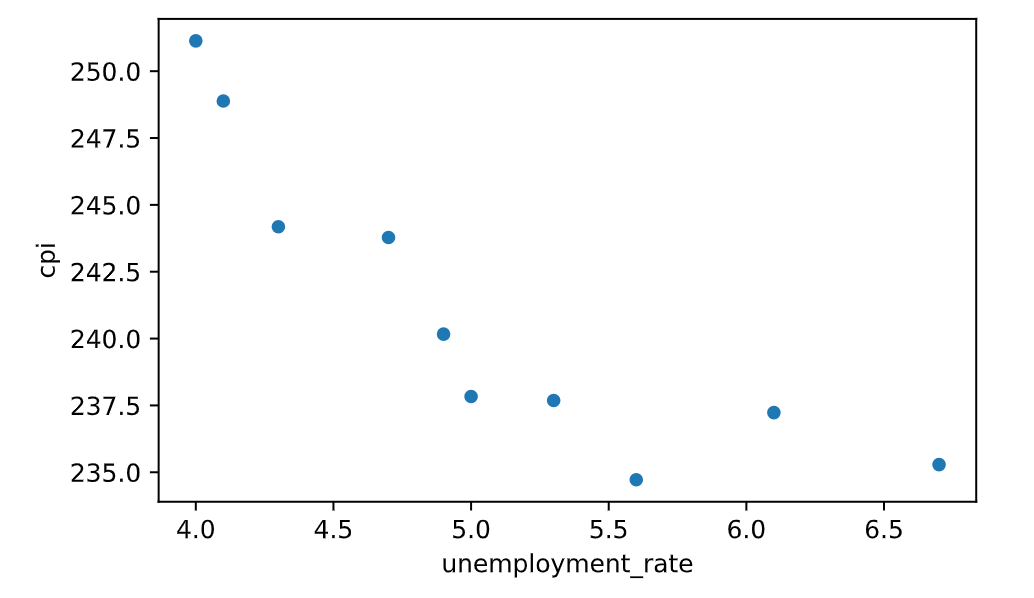

In [23]:
print(sp500.columns)
print(pop.columns)


Index(['Date', 'A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN',
       ...
       'XEL', 'XLNX', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=481)
Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')


**merge_ordered() caution, multiple columns**

When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.


* Use merge_ordered() on gdp and pop, merging on columns date and country with the fill feature, save to ctry_date.
* Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.

In [24]:
pop = pd.read_csv("/kaggle/input/world-population-dataset/world_population.csv")
pop.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [ ]:
# Merge on 'Date' and 'Country/Territory'
ctry_date = pd.merge_ordered(sp500,gdp, on=['Date','Country Code'], fill_method='ffill')

# Print the result
print(ctry_date)


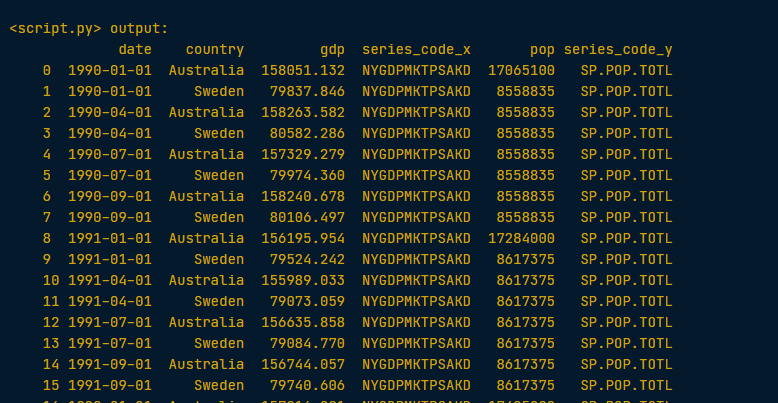

Nice! When you merge on date first, the table is sorted by date then country. When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and Sweden for the remainder of the year. This is not what you want. The fill forward is using unintended data to fill in the missing values. However, when you merge on country first, the table is sorted by country then date, so the forward fill is applied appropriately in this situation.

**Using merge_asof() to study stocks**

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named jpm, wells, and bac.


* Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.
* Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.
* Plot the close prices of close_jpm, close_wells, and close_bac from price_diffs.

In [ ]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on ="date_time", suffixes = ["","_wells"],direction ="nearest")


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on ="date_time", suffixes = ["_jpm", "_bac"],
direction ="nearest")


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

Fabulous! You can see that during this period, the price change for these bank stocks was roughly the same, although the price change for _JP Morgan_ was more variable. The critical point here is that the merge_asof() function is very useful in performing the fuzzy matching between the timestamps of all the tables.

